# 1 loan

(first 선생님)(second Me)

- Loan Status Data Set
- Loan Status 데이터 셋을 이용해서 대출을 받을 자격이 있는지를 구분하는 모델 만들기

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from IPython.display import Image
#!pip install IPython

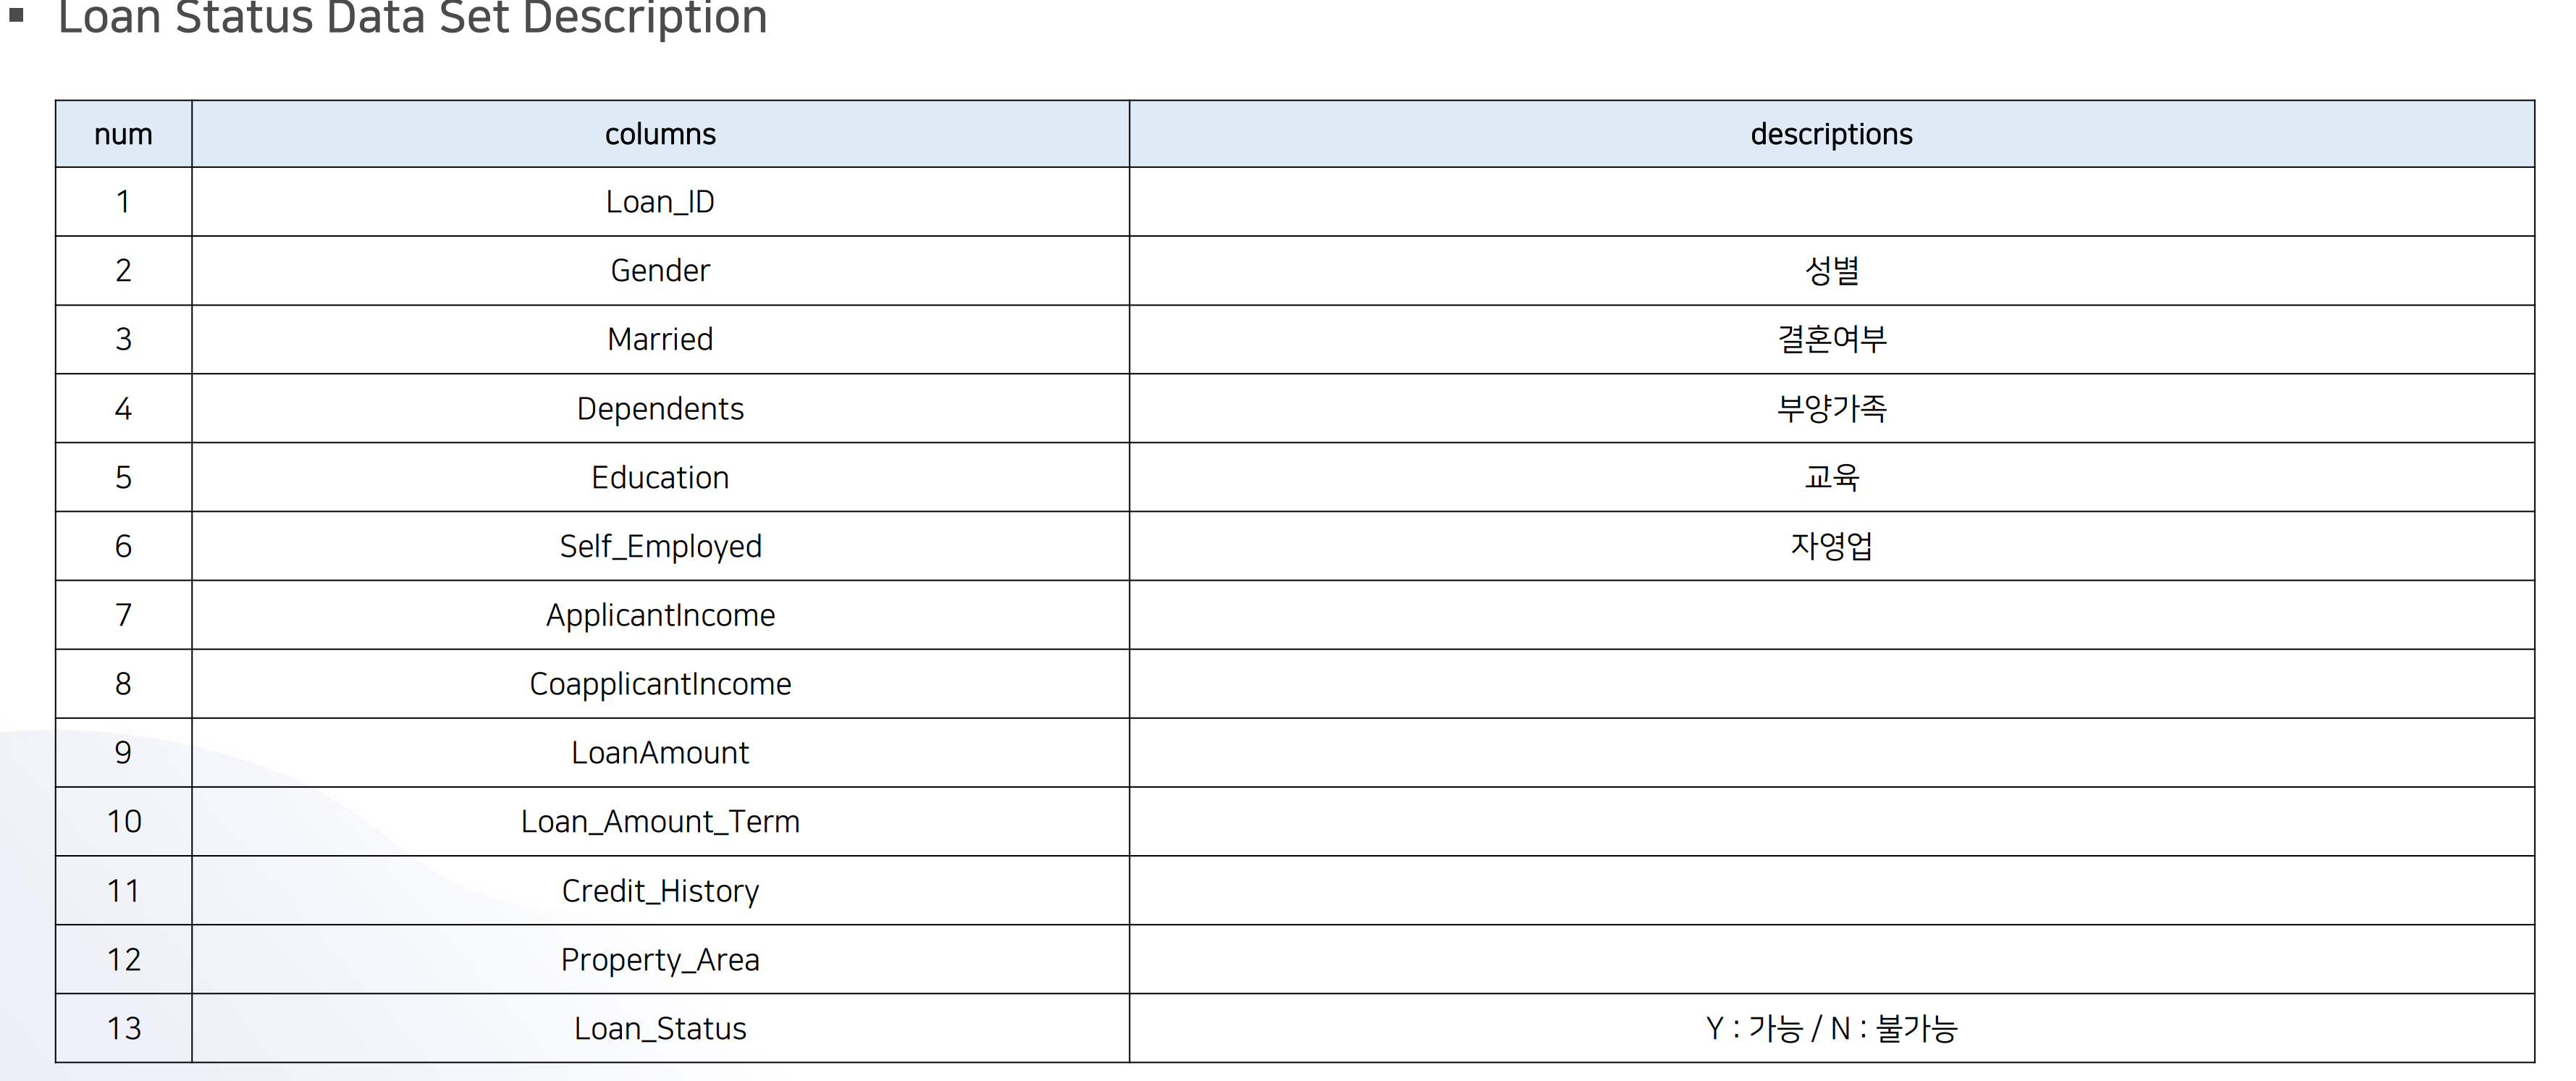

In [2]:
Image('C:\\Users\\user\\Desktop\\python\\4주\\20DAY\\loan_photo.PNG')

# data read

# 제일 중요한점 

- 지금 나는 데이터를 보고 한눈에 어떤 모델이 제일 적절할지 판단하지 못하니 
노가다를 사알짝 해야함.... 
데이터를 부른후 모델을 돌려보고 디테일도 바꿔보고 돌려보고
모델을 바꿔서 돌려보고 스칼라써서 돌려보고 
데이터 전처리를 다시 꼼꼼히 해서 돌력보고.. 무한반복

In [3]:
data = pd.read_csv('Loan.csv')

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [8]:
d_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [9]:
d_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [10]:
# 내가 처음으로 내힘으로 작성한 for문 
for col in d_columns :
    print(data[col].value_counts())
    print('----')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
----
Male      489
Female    112
Name: Gender, dtype: int64
----
Yes    398
No     213
Name: Married, dtype: int64
----
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----
No     500
Yes     82
Name: Self_Employed, dtype: int64
----
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
----
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
----
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.

In [11]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# 성별의 최빈값
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [13]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
# null 값 나타내기 .ver
data['Gender'].value_counts(dropna= False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [15]:
male = data['Gender'].value_counts(dropna= False)[0]

In [16]:
female = data['Gender'].value_counts(dropna= False)[1]

In [17]:
na = data['Gender'].value_counts(dropna= False)[2]

In [18]:
print('male 의 비율  : %.2f' %(male / len(data)*100))
print('female 의 비율  : %.2f' %(female / len(data)*100))
print('na 의 비율  : %.2f' %(na / len(data)*100))

male 의 비율  : 79.64
female 의 비율  : 18.24
na 의 비율  : 2.12


## 1. null drop

In [19]:
#data.shape

In [20]:
#data = data.dropna()

In [21]:
#data.shape

### 1-1 null 값 최빈값으로(for문 응용)

In [22]:
na_obj_col = ['Gender','Married','Dependents','Self_Employed']

In [23]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace= True)

In [24]:
for col in na_obj_col :
    data[col].fillna(data[col].mode()[0],inplace= True)

### 1-2 null 값 중앙값으로 (for문 응용)

In [25]:
na_f_col = ['LoanAmount','Loan_Amount_Term','Credit_History']

In [26]:
data['Loan_Amount_Term'].median()

360.0

In [27]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)

In [28]:
for col in na_f_col :
    data[col].fillna(data[col].median(),inplace=True)

In [29]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 1-3 딕셔너리 형태로 피클로 저장해서 시스템에서 사용하도록 메이키

In [30]:
na_dict = {}
na_col= ['Gender','Married','Dependents','Self_Employed']
for col in na_col :
    na_dict[col] = data[col].mode()[0]
    
na_dict['LoanAmount'] = data['LoanAmount'].median()
na_dict['Loan_Amount_Term'] = data['Loan_Amount_Term'].mode()[0]
na_dict['Credit_History'] = data['Credit_History'].mode()[0]

In [31]:
na_dict

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Self_Employed': 'No',
 'LoanAmount': 128.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0}

In [32]:
#파일 저장 
with open ('na_dict.pkl','wb') as f:
    pickle.dump(na_dict,f)

In [33]:
#파일 확인 
with open ('na_dict.pkl','rb') as f:
    load_dict = pickle.load(f)

## 2. object 형태 인트로 치환 (for문)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
obj_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']

In [36]:
for col in obj_col :
    label = LabelEncoder()
    data[col] = label.fit_transform(data[col])
    filename = 'label2_' + col + '.pkl'
    with open(filename, 'wb') as f :
        pickle.dump(label, f)    

### x,y 선언

In [37]:
x = data.drop(['Loan_Status','Loan_ID'],axis = 1)

In [38]:
y = data['Loan_Status']

In [39]:
x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size = 0.2, random_state=0)

In [40]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
533,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
355,0,0,0,0,0,3813,0.0,116.0,180.0,1.0,2
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,3103,1300.0,80.0,360.0,1.0,2
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
359,1,1,3,0,0,5167,3167.0,200.0,360.0,1.0,1
192,1,1,0,1,0,6033,0.0,160.0,360.0,1.0,2


### scaler 사용`

In [41]:
scaler = MinMaxScaler()

In [42]:
x_train = scaler.fit_transform(x_train)

In [43]:
x_train

array([[1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 0.        , 0.33333333, ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.72972973, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        0.5       ]])

In [44]:
x_test = scaler.fit_transform(x_test)

In [45]:
x_test

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       [1.        , 1.        , 1.        , ..., 0.35897436, 0.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ]])

In [46]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

In [47]:
with open('scaler.pkl','rb') as f:
        scaler = pickle.load(f)

-

### LogisticRegression 사용

In [48]:
model = LogisticRegression()

In [49]:
model

LogisticRegression()

In [50]:
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
model.score(x_train, y_train)

0.8044806517311609

In [52]:
model.score(x_test, y_test)

0.8292682926829268

-  모델 저장

In [53]:
model

LogisticRegression()

In [54]:
with open ('model.pkl', 'wb') as f :
    pickle.dump(model ,f)

In [55]:
with open ('model.pkl', 'rb') as f :
    load_model = pickle.load(f)

### SCV사용 

In [56]:
model2 = SVC(kernel='rbf',C=10)

In [57]:
model2.fit(x_train, y_train)

SVC(C=10)

In [58]:
model2.score(x_train, y_train)

0.8187372708757638

In [59]:
model2.score(x_test, y_test)

0.7967479674796748

- 모델 저장

In [60]:
model2

SVC(C=10)

In [61]:
with open ('model2.pkl', 'wb') as f :
    pickle.dump(model2 ,f)

In [62]:
with open ('model2.pkl', 'rb') as f :
    load_model2 = pickle.load(f)